# GUN VIOLENCE IN NYC 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('NYPD_911_2021.csv')
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,73973369,01/01/2021,12/31/2020,23:13:14,40.0,BRONX,PATROL BORO BRONX,1003322,235705,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2021 12:06:24 AM,01/01/2021 12:06:24 AM,NaN,01/01/2021 12:52:29 AM,40.813619,-73.931102
1,73973980,01/01/2021,12/31/2020,23:59:22,68.0,BROOKLYN,PATROL BORO BKLYN SOUTH,975951,164143,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2021 12:01:07 AM,01/01/2021 12:07:05 AM,01/01/2021 12:29:47 AM,01/01/2021 12:41:16 AM,40.617215,-74.029894
2,73973990,01/01/2021,01/01/2021,00:00:06,81.0,BROOKLYN,PATROL BORO BKLYN NORTH,1006343,186591,10S2,INVESTIGATE/POSSIBLE CRIME: SHOTS FIRED/OUTSIDE,Critical,01/01/2021 12:00:06 AM,01/01/2021 12:00:37 AM,01/01/2021 12:02:30 AM,01/01/2021 12:35:03 AM,40.678807,-73.920349
3,73973991,01/01/2021,01/01/2021,00:00:08,107.0,QUEENS,PATROL BORO QUEENS SOUTH,1038733,200582,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,01/01/2021 12:00:09 AM,01/01/2021 12:00:09 AM,01/01/2021 12:00:09 AM,01/01/2021 01:43:36 AM,40.717068,-73.803461
4,73973992,01/01/2021,01/01/2021,00:00:10,42.0,BRONX,PATROL BORO BRONX,1011125,241994,54E1,AMBULANCE CASE: EDP/INSIDE,Non CIP,01/01/2021 12:00:10 AM,01/01/2021 12:00:42 AM,NaN,01/01/2021 04:32:22 AM,40.830860,-73.902887


In [3]:
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'])

In [4]:
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,73973369,01/01/2021,2020-12-31,23:13:14,40.0,BRONX,PATROL BORO BRONX,1003322,235705,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2021 12:06:24 AM,01/01/2021 12:06:24 AM,NaN,01/01/2021 12:52:29 AM,40.813619,-73.931102
1,73973980,01/01/2021,2020-12-31,23:59:22,68.0,BROOKLYN,PATROL BORO BKLYN SOUTH,975951,164143,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2021 12:01:07 AM,01/01/2021 12:07:05 AM,01/01/2021 12:29:47 AM,01/01/2021 12:41:16 AM,40.617215,-74.029894
2,73973990,01/01/2021,2021-01-01,00:00:06,81.0,BROOKLYN,PATROL BORO BKLYN NORTH,1006343,186591,10S2,INVESTIGATE/POSSIBLE CRIME: SHOTS FIRED/OUTSIDE,Critical,01/01/2021 12:00:06 AM,01/01/2021 12:00:37 AM,01/01/2021 12:02:30 AM,01/01/2021 12:35:03 AM,40.678807,-73.920349
3,73973991,01/01/2021,2021-01-01,00:00:08,107.0,QUEENS,PATROL BORO QUEENS SOUTH,1038733,200582,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,01/01/2021 12:00:09 AM,01/01/2021 12:00:09 AM,01/01/2021 12:00:09 AM,01/01/2021 01:43:36 AM,40.717068,-73.803461
4,73973992,01/01/2021,2021-01-01,00:00:10,42.0,BRONX,PATROL BORO BRONX,1011125,241994,54E1,AMBULANCE CASE: EDP/INSIDE,Non CIP,01/01/2021 12:00:10 AM,01/01/2021 12:00:42 AM,NaN,01/01/2021 04:32:22 AM,40.830860,-73.902887


In [5]:
df['INCIDENT_TIME'] = pd.to_datetime(df['INCIDENT_TIME'], format='%H:%M:%S')

In [6]:
df['NYPD_PCT_CD'] = df['NYPD_PCT_CD'].astype(str)

In [7]:
df.columns

Index(['CAD_EVNT_ID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME',
       'NYPD_PCT_CD', 'BORO_NM', 'PATRL_BORO_NM', 'GEO_CD_X', 'GEO_CD_Y',
       'RADIO_CODE', 'TYP_DESC', 'CIP_JOBS', 'ADD_TS', 'DISP_TS', 'ARRIVD_TS',
       'CLOSNG_TS', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
df = df[['CAD_EVNT_ID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME','NYPD_PCT_CD', 'BORO_NM', 'PATRL_BORO_NM','TYP_DESC','CIP_JOBS']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707027 entries, 0 to 6707026
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   CAD_EVNT_ID    int64         
 1   CREATE_DATE    object        
 2   INCIDENT_DATE  datetime64[ns]
 3   INCIDENT_TIME  datetime64[ns]
 4   NYPD_PCT_CD    object        
 5   BORO_NM        object        
 6   PATRL_BORO_NM  object        
 7   TYP_DESC       object        
 8   CIP_JOBS       object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 460.5+ MB


Checking for Null values

In [10]:
df.isnull().sum()

CAD_EVNT_ID      0
CREATE_DATE      0
INCIDENT_DATE    0
INCIDENT_TIME    0
NYPD_PCT_CD      0
BORO_NM          0
PATRL_BORO_NM    0
TYP_DESC         0
CIP_JOBS         0
dtype: int64

### Overall 911 calls within the boroughs

First, I would like to explore the types of calls to 911 in the 5 boroughs. This will tell us the variety of emergencies reported to 911.

In [11]:
df['TYP_DESC'].value_counts()

VISIBILITY PATROL: DIRECTED                         1137938
SEE COMPLAINANT: OTHER/INSIDE                        549431
STATION INSPECTION BY TRANSIT BUREAU PERSONNEL       433345
TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP             364330
COMMUNITY TIME                                       254462
                                                     ...   
SEE COMPLAINANT: ASSIST MARSHALL/LTD ACC HWY              1
OTHER CRIMES (IN PROGRESS): TRESPASS/LTD ACC HWY          1
ROBBERY (PAST): COMMERCIAL/TRANSIT                        1
AMBULANCE 2ND CALL VERIFY                                 1
BURGLARY (IN PROGRESS): OTHER/LTD ACC HWY                 1
Name: TYP_DESC, Length: 428, dtype: int64

There appears to be **428** different types of calls.

In [12]:
df['TYP_DESC'].nunique()

428

Next, I would like to see the number of calls to get a sense of where most of these emergencies are occurring.<br>
I would like to see the serious and critical calls.

In [13]:
df['CIP_JOBS'].value_counts()

Non CIP         6263285
Non Critical     219735
Serious          143279
Critical          80728
Name: CIP_JOBS, dtype: int64

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

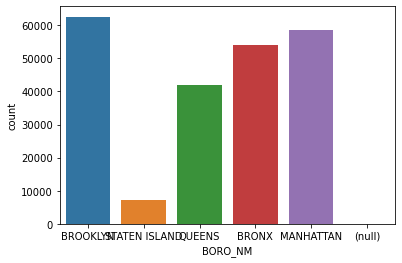

In [14]:
crimes = df[(df['CIP_JOBS']=='Serious') | (df['CIP_JOBS']=='Critical')]
sns.countplot(x=crimes['BORO_NM'])

**Top 10 precincts where serious and critical calls occur.** <br>
From the output below, we see that most calls are mostly in Bronx and Brooklyn precincts.

In [15]:
crimes['NYPD_PCT_CD'].value_counts().head(10)

75.0    8290
47.0    6594
44.0    6293
43.0    5711
73.0    5678
40.0    5676
46.0    5270
52.0    4979
67.0    4896
42.0    4650
Name: NYPD_PCT_CD, dtype: int64

Now I would like to see the different types of serious and critical crimes.

In [16]:
crimes['TYP_DESC'].value_counts()

LARCENY (IN PROGRESS): OTHER/INSIDE               48865
ASSAULT (IN PROGRESS): OTHER/FAMILY               26038
ASSAULT (IN PROGRESS): OTHER/INSIDE               22006
ASSAULT (IN PROGRESS): OTHER/OUTSIDE              21531
SHOT SPOTTER                                      13623
                                                  ...  
LARCENY (IN PROGRESS): VEHICLE/TRANSIT                3
ROVING BAND: TRANSIT                                  2
LARCENY (IN PROGRESS): FROM PERSON/LTD ACC HWY        2
BURGLARY (IN PROGRESS): OTHER/LTD ACC HWY             1
ROBBERY (IN PROGRESS): COMMERCIAL/LTD ACC HWY         1
Name: TYP_DESC, Length: 74, dtype: int64

**Amount of calls of "shots fired" and "Shot Spotter" technology.** <br>
As we see here most of the shots fired and shot spotter calls are in Bronx and Brooklyn.<br>
Shotspotter is a gunshot detection system that identifies and accurately reports gunshots to the closest precinct in seconds.

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

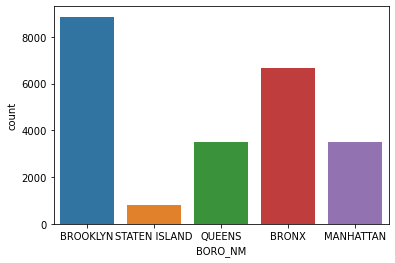

In [17]:
shots = crimes[(crimes['TYP_DESC']=='INVESTIGATE/POSSIBLE CRIME: SHOTS FIRED/OUTSIDE') | (crimes['TYP_DESC']=='SHOT SPOTTER')|(crimes['TYP_DESC']=='INVESTIGATE/POSSIBLE CRIME: SHOTS FIRED/TRANSIT')|(crimes['TYP_DESC']=='INVESTIGATE/POSSIBLE CRIME: SHOTS FIRED/INSIDE')]
sns.countplot(x=shots['BORO_NM'])

**Top 10 precincts where calls for shots fired occur.**

In [18]:
shots['NYPD_PCT_CD'].value_counts().head(10)

75.0     1894
47.0     1299
73.0     1134
67.0      999
43.0      847
44.0      698
34.0      683
42.0      661
48.0      651
113.0     642
Name: NYPD_PCT_CD, dtype: int64

**Days in 2021 with the most shootings...** <br>
We can tell from the data that within the top 5 days of shots being fired,  <br>
that 4 are in the months that the weather begins to warm up in NYC. <br>
- One interesting find is that the highest day of gun activity is on New Years Day; <br>
  Most likely when people shoot into the sky after the ball drops.<br>
- Another interesting find is that the second highest day of shootings is on the 4th of July. <br>
  It makes me wonder if the Shotspotter is also picking up fireworks and confusing them with <br>
  gunshots. <br>
  Shotspotter doesn't think so.
  When asked about if the Shotspotter system confuses fireworks from gunshots, Sacramento Police stated that <br>
  **“The system is designed to be able to differentiate between sounds of gunfire from the sounds of other similar sounds like        fireworks,”** <br>
  Shot spotter officials say the technology, which measures distance, direction and wavelengths of sounds only picks up gunfire. 
  

In [19]:
shots['INCIDENT_DATE'].value_counts().head(5)

2021-01-01    204
2021-07-04    201
2021-06-20    170
2021-05-02    137
2021-06-06    133
Name: INCIDENT_DATE, dtype: int64

In [20]:
july4 = shots[shots['INCIDENT_DATE'] == "2021-07-04"]
j4 = july4['TYP_DESC']

In [21]:
from matplotlib import rcParams

<AxesSubplot:xlabel='TYP_DESC', ylabel='count'>

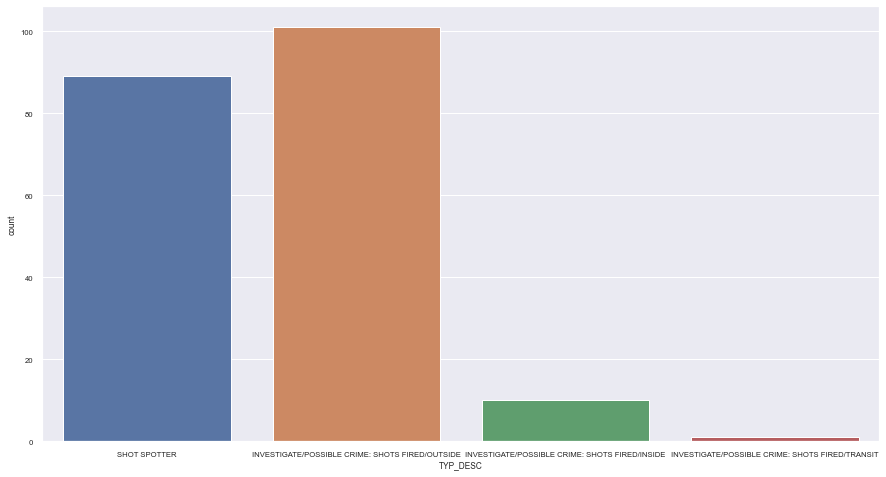

In [22]:
rcParams['figure.figsize'] = 15,8
sns.set(font_scale=0.7)
sns.countplot(x=j4)

**Most frequent months where shots are fired in 2021** <br>
From the output we see that most calls reporting gunshots occur in May and June and declines from there.

<AxesSubplot:xlabel='INCIDENT_DATE', ylabel='count'>

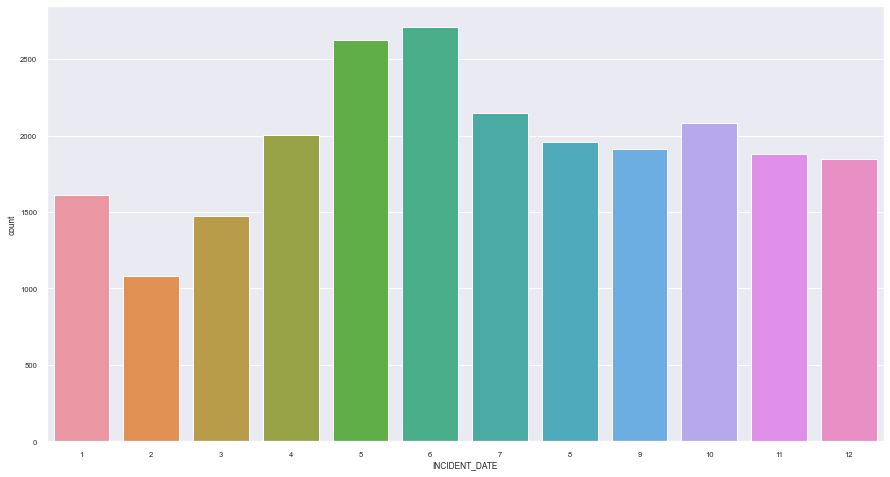

In [23]:
months = pd.DatetimeIndex(shots['INCIDENT_DATE']).month
sns.countplot(x=months)

**Most frequent hours when shots are called in or detected** <br>
Also, we see that most shooting incidents increase from 8pm and begin to decline after midnight.

<AxesSubplot:xlabel='INCIDENT_TIME', ylabel='count'>

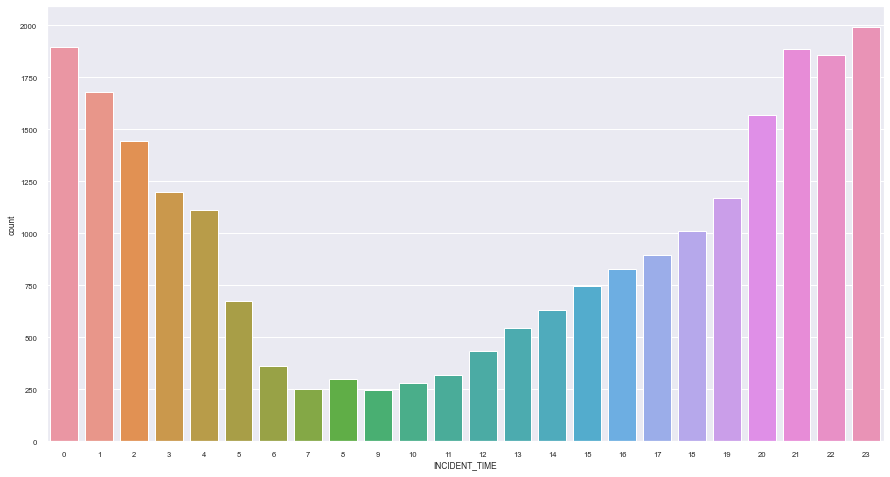

In [24]:
hours = pd.DatetimeIndex(shots['INCIDENT_TIME']).hour
sns.countplot(x=hours)

## Conclusion:

As we all have noticed after 2020, the city and the country as a whole are experiencing huge increases in gun activity. <br>
With our new mayor promising to deploy additional units to highly affected areas, we have yet to see if this is an effective <br>
measure or not. Although these stats are way lower than what we have experienced in the 90s, the recent gun violence is a <br>
grim reminder of what it was.